     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 45.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 17.0.0 which 

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1733236388.245836      78 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733236388.344919      78 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733236389.169618      77 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


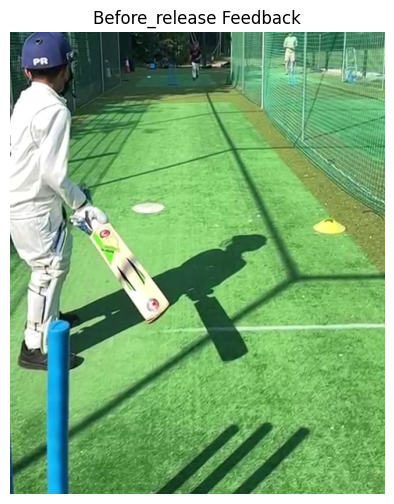

Feedback for Before_release:
  Head Position: Move the head higher to maintain a balanced posture.
  Foot Placement: Balanced
  Body Balance: Adjust your stance for better body balance, especially around the hips and ankles.
--------------------------------------------------


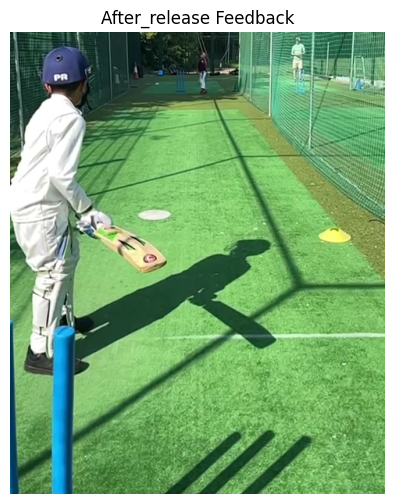

Feedback for After_release:
  Head Position: Move the head higher to maintain a balanced posture.
  Foot Placement: Balanced
  Body Balance: Good
--------------------------------------------------


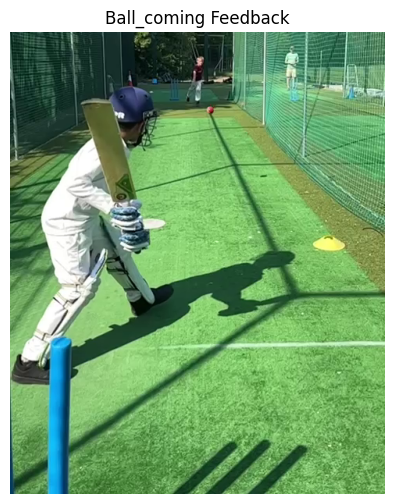

Feedback for Ball_coming:
  Head Position: Move the head higher to maintain a balanced posture.
  Foot Placement: Align your feet more evenly to maintain balance during the shot.
  Body Balance: Good
--------------------------------------------------


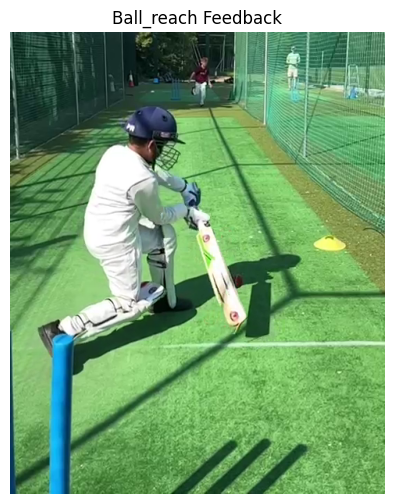

Feedback for Ball_reach:
  Head Position: Move the head higher to maintain a balanced posture.
  Foot Placement: Align your feet more evenly to maintain balance during the shot.
  Body Balance: Good
--------------------------------------------------


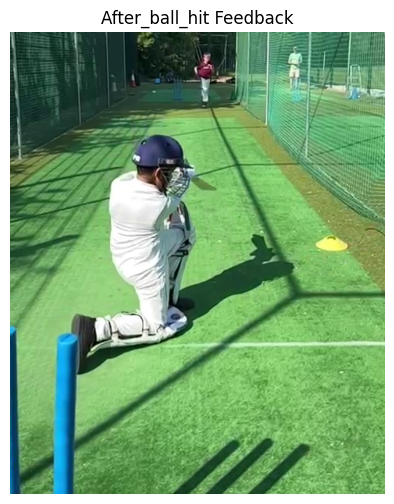

Feedback for After_ball_hit:
  Head Position: Move the head higher to maintain a balanced posture.
  Foot Placement: Align your feet more evenly to maintain balance during the shot.
  Body Balance: Good
--------------------------------------------------


In [ ]:
# Install compatible versions
!pip install numpy==1.24.4 protobuf==3.20.3 scipy==1.13
!pip install mediapipe

# Import required libraries
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose model for pose estimation
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Function to extract frames for specific moments from a cricket video
def extract_key_moments(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = {'before_release': None, 'after_release': None, 'ball_coming': None, 'ball_reach': None, 'after_ball_hit': None}
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Approximate moments in the video to analyze
    moments = {'before_release': frame_count // 6,
               'after_release': frame_count // 2,
               'ball_coming': int(frame_count * 0.75),
               'ball_reach': int(frame_count * 0.8),
               'after_ball_hit': int(frame_count * 0.85)}

    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        count += 1
        
        # Extract specific frames
        for key, moment in moments.items():
            if count == moment:
                frames[key] = frame
                break
    cap.release()
    return frames

# Function to analyze a frame and provide feedback
def analyze_frame(frame, moment_name):
    feedback = {}
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(frame_rgb)

    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        
        # Head position
        head_position = (landmarks[mp_pose.PoseLandmark.NOSE].x, landmarks[mp_pose.PoseLandmark.NOSE].y)
        
        # Foot positions
        left_ankle = (landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE].y)
        right_ankle = (landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE].y)
        
        # Body balance
        left_hip = (landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y)
        right_hip = (landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y)
        body_balance = np.linalg.norm(np.array(left_hip) - np.array(left_ankle)) + np.linalg.norm(np.array(right_hip) - np.array(right_ankle))
        
        # Feedback
        feedback['Head Position'] = "Good" if head_position[1] > 0.4 else "Move the head higher to maintain a balanced posture."
        feedback['Foot Placement'] = "Balanced" if abs(left_ankle[0] - right_ankle[0]) < 0.2 else "Align your feet more evenly to maintain balance during the shot."
        feedback['Body Balance'] = "Good" if body_balance < 0.5 else "Adjust your stance for better body balance, especially around the hips and ankles."
    
    return feedback

# Function to analyze key moments and provide feedback
def analyze_key_moments(video_path):
    frames = extract_key_moments(video_path)
    feedback_summary = {}

    for moment, frame in frames.items():
        if frame is not None:
            feedback_summary[moment] = analyze_frame(frame, moment)
        else:
            feedback_summary[moment] = "Frame not captured."
    
    return frames, feedback_summary

# Example usage
video_path = '/kaggle/input/batting-sample/Batting-01.mp4'  # Replace with your video path
frames, feedback_summary = analyze_key_moments(video_path)

# Display results
for moment, frame in frames.items():
    if frame is not None:
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.title(f"{moment.capitalize()} Feedback")
        plt.axis('off')
        plt.show()

        print(f"Feedback for {moment.capitalize()}:")
        if isinstance(feedback_summary[moment], dict):
            for key, value in feedback_summary[moment].items():
                print(f"  {key}: {value}")
        else:
            print("  Feedback not available.")
    print("--------------------------------------------------")
